In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.colors as colors
from matplotlib.patches import Ellipse
%matplotlib inline
import math
import fitClus2D as fc
from scipy.stats import sigmaclip
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

import astropy
from astropy.stats import sigma_clip
from astropy.io import fits
from astropy.wcs import WCS
from astropy.cosmology import LambdaCDM
import corner
import DeltaSquared as ds

from PIL import Image

# These cuts get you a 4x4 arcmin square centered on the image center of the fields
img_cuts = {'a2744':[[519,4520],[412,4413]],
            'm0416':[[367,4368],[380,4381]]}
img_files = {'a2744':'Files/abell2744_RGB.fits',
             'm0416':'Files/macs0416_RGB.fits'}

zclus = {'a2744' : 0.308,
         'm0416' : 0.396}
pgals = {'a2744' : [1.689791e-01, 1.965115e+00, 2.0],
        'm0416' : [3.737113e-01, 1.322081e+00, 2.0]}


In [23]:
cluster = 'a2744'




In [38]:
def getstat(mode1, mode2):
    chain1 = np.load("Files/mcmc/" + cluster + "/" + mode1 + "-mc-main.npy")
    
    chain2 = np.load("Files/mcmc/" + cluster + "/" + mode2 + "-mc-main.npy")
    
    return ds.TwoSampleTest(chain1, chain2)

In [39]:
modes = ["sigma", "box", "rnn", "knn"]

labels = []
results = []

for i in range(len(modes)):
    for j in range(i + 1, len(modes)):
        labels.append(modes[i] + "-" + modes[j])
        results.append(getstat(modes[i], modes[j]))
    


[Text(0, 0, 'sigma-box'),
 Text(1, 0, 'sigma-rnn'),
 Text(2, 0, 'sigma-knn'),
 Text(3, 0, 'box-rnn'),
 Text(4, 0, 'box-knn'),
 Text(5, 0, 'rnn-knn')]

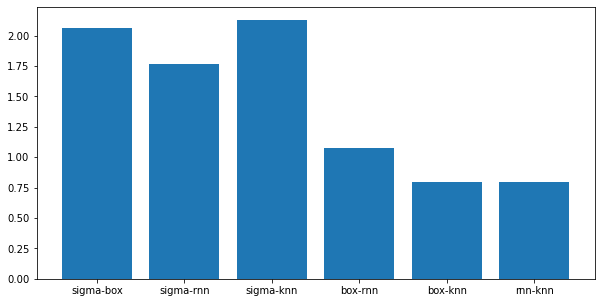

In [40]:
#differences between models
fig, ax = plt.subplots(figsize = (10, 5))
ind = range(len(labels))
ax.bar(ind, results)
ax.set_xticks(ind)
ax.set_xticklabels(labels)



In [78]:
#galaxy number variation
def plothist(mode):
    gal = fc.galclass("Files/GalaxyData/" + cluster + "-def-" + mode + ".txt")
    gal.scale()
    
    nums = []
    for i in range(10000):
        gal.draw()
        nums.append(np.sum(gal.p[:,7]))
        
    plt.hist(nums)
    plt.axvline(x=255, color = "red")

Read galaxy data from file Files/GalaxyData/a2744-def-rnn.txt


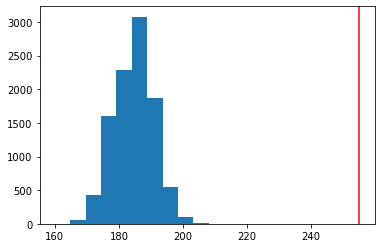

In [74]:
plothist("rnn")

Read galaxy data from file Files/GalaxyData/a2744-def-knn.txt


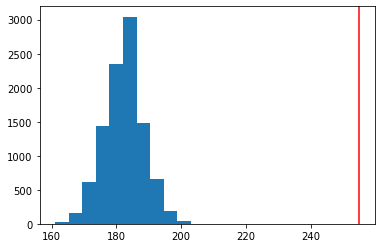

In [75]:
plothist("knn")

Read galaxy data from file Files/GalaxyData/a2744-def-box.txt


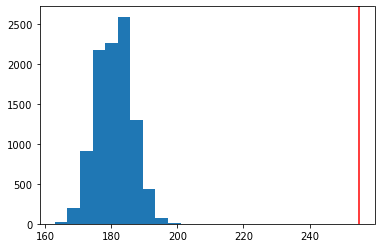

In [76]:
plothist("box")

In [97]:
#analysis of average luminosities
def getave(mode):
    gal = fc.galclass("Files/GalaxyData/" + cluster + "-def-" + mode + ".txt", verbose = False)
    gal.scale()
    
    print(mode + ": " + str(np.sum(gal.dat[:,2] * gal.dat[:,3]) / np.sum(gal.dat[:,3])))
    

In [98]:
for mode in modes:
    getave(mode)

sigma: 21.414452549019607
box: 20.7906294820008
rnn: 20.82618509231604
knn: 20.808177183356197
